In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading file

df=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#columns
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
for i in range(len(df.columns)):
  if(df[df.columns[i]].nunique()<5):
    if(df[df.columns[i]].dtype=='int64'):
      df.iloc[:,i]=df.iloc[:,i].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(3), int64(4)
memory usage:

1. What is the distribution of age among heart failure patients in the dataset?

<Axes: xlabel='age', ylabel='Count'>

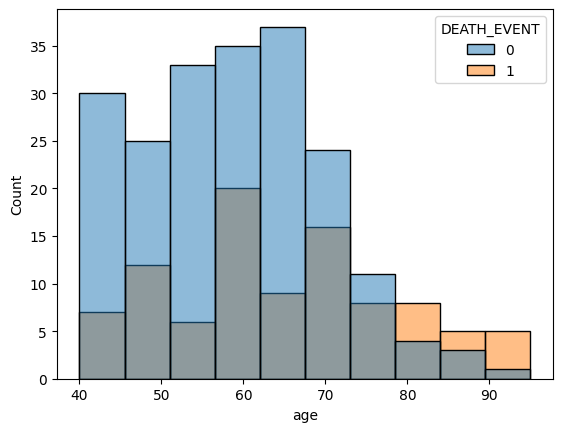

In [ ]:
#distribution of age among heart failure patients in the dataset

sns.histplot(data=df,x='age',hue='DEATH_EVENT')

<Axes: xlabel='DEATH_EVENT', ylabel='age'>

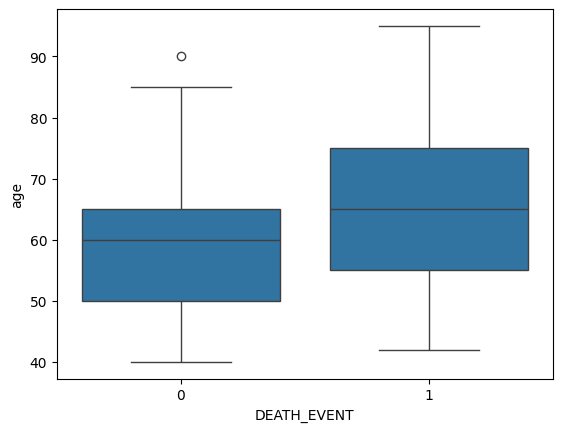

In [ ]:
sns.boxplot(data=df,x='DEATH_EVENT',y='age')

<Axes: xlabel='DEATH_EVENT', ylabel='age'>

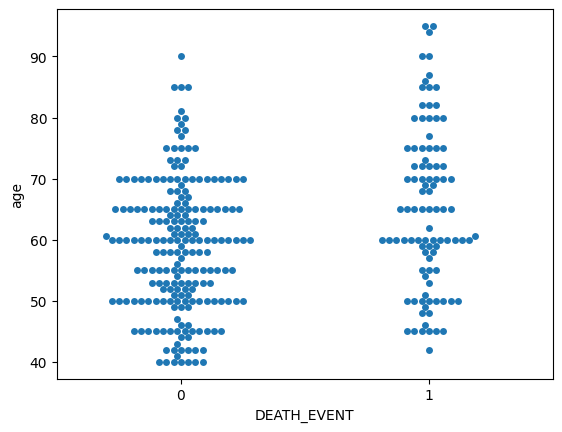

In [ ]:
sns.swarmplot(data=df,x='DEATH_EVENT',y='age')

<Axes: xlabel='DEATH_EVENT', ylabel='age'>

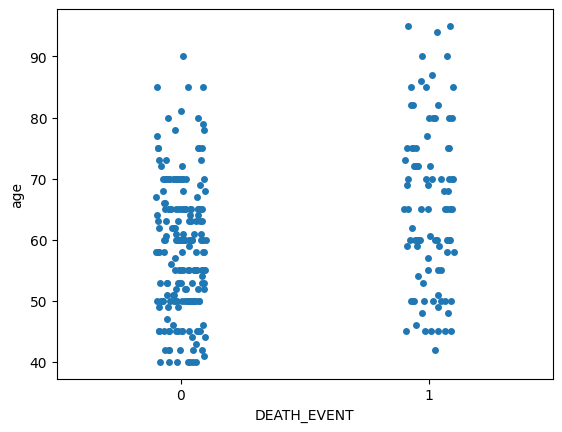

In [ ]:
sns.stripplot(data=df,x='DEATH_EVENT',y='age')

In [ ]:
#code

df.groupby('DEATH_EVENT')['age'].describe()

<ipython-input-15-ec5521dfb187>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('DEATH_EVENT')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,58.761906,10.637890,40.0,50.0,60.0,65.0,90.0
1,96.0,65.215281,13.214556,42.0,55.0,65.0,75.0,95.0


#we can also pivot table

In [ ]:
df.pivot_table(index='DEATH_EVENT',values='age',aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
DEATH_EVENT,,,,,,,,
0,50.0,60.0,65.0,203.0,90.0,58.761906,40.0,10.637890
1,55.0,65.0,75.0,96.0,95.0,65.215281,42.0,13.214556


<Axes: xlabel='age', ylabel='Density'>

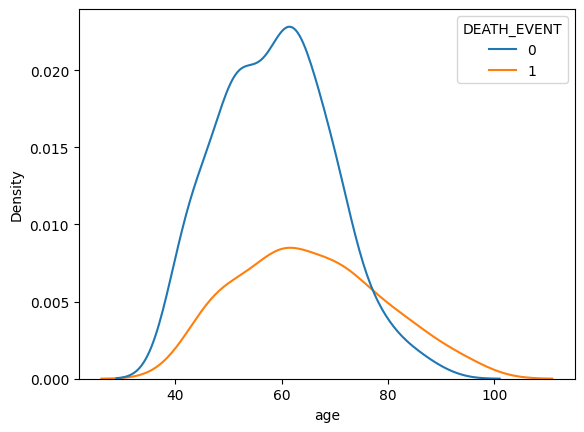

In [ ]:
sns.kdeplot(data=df,x='age',hue='DEATH_EVENT')

2.How does the death rate vary with age?

<ipython-input-18-e7ecd7ad16f0>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_df=df.groupby(['age_bin','DEATH_EVENT']).size().unstack()


<Axes: xlabel='age_bin'>

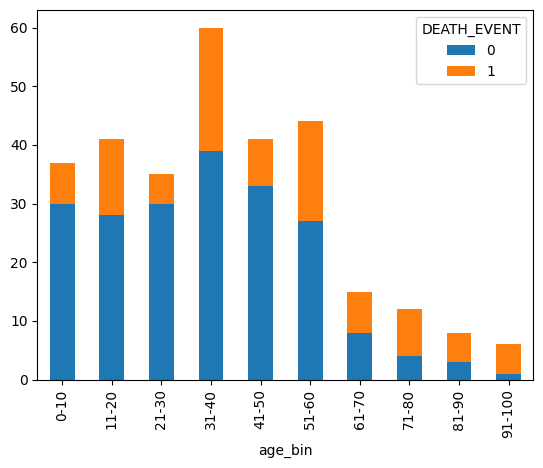

In [ ]:
# death rate vary with age
#as  age is a continuous in nature we cant directly visualize how death rate varty with age
#now lets convert it into bins

df['age_bin']=pd.cut(df['age'],bins=10,labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'],right=True)
new_df=df.groupby(['age_bin','DEATH_EVENT']).size().unstack()

new_df.plot(kind='bar',stacked=True)




#observations:

#the heart failure patients are mostly in the range 0 to 60 age
#in that range also the category of age 41-50 there are mostly heart failures
#the age group 61-100 are less in number

#but the people under the category 0- 60 age has higher probabaility chances of living
#but the category 61-100 have higher chances of death occur
#if we observe from age 61-100 the probability of chance of death has increased rapidly




3.What is the percentage of male and female patients in the dataset?

In [ ]:
per_male=(len(df[df['sex']==1])/len(df['sex']))*100
per_female=(len(df[df['sex']==0])/len(df['sex']))*100

print(f'percentage of male patients are {per_male}')
print(f'percentage of female patients are {per_female}')

percentage of male patients are 64.88294314381271
percentage of female patients are 35.11705685618729


<Axes: xlabel='sex', ylabel='count'>

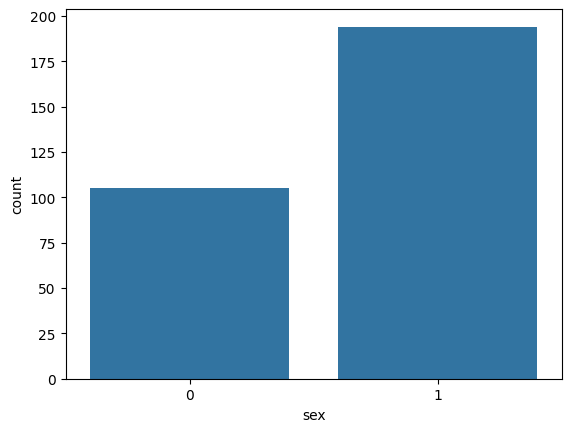

In [ ]:
#visualizing

sns.countplot(data=df,x='sex')

4. how does the platelet count vary among different age groups?

<Axes: xlabel='platelets', ylabel='Density'>

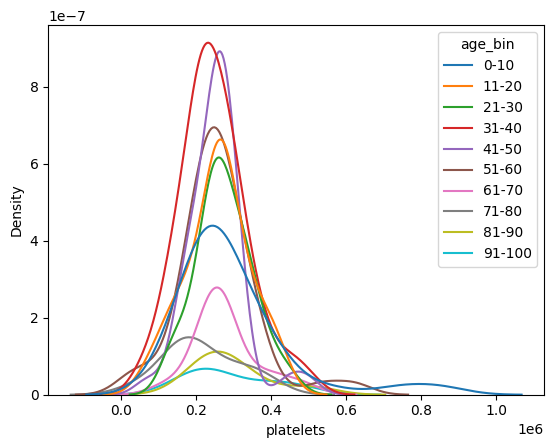

In [ ]:
sns.kdeplot(data=df,x='platelets',hue='age_bin')

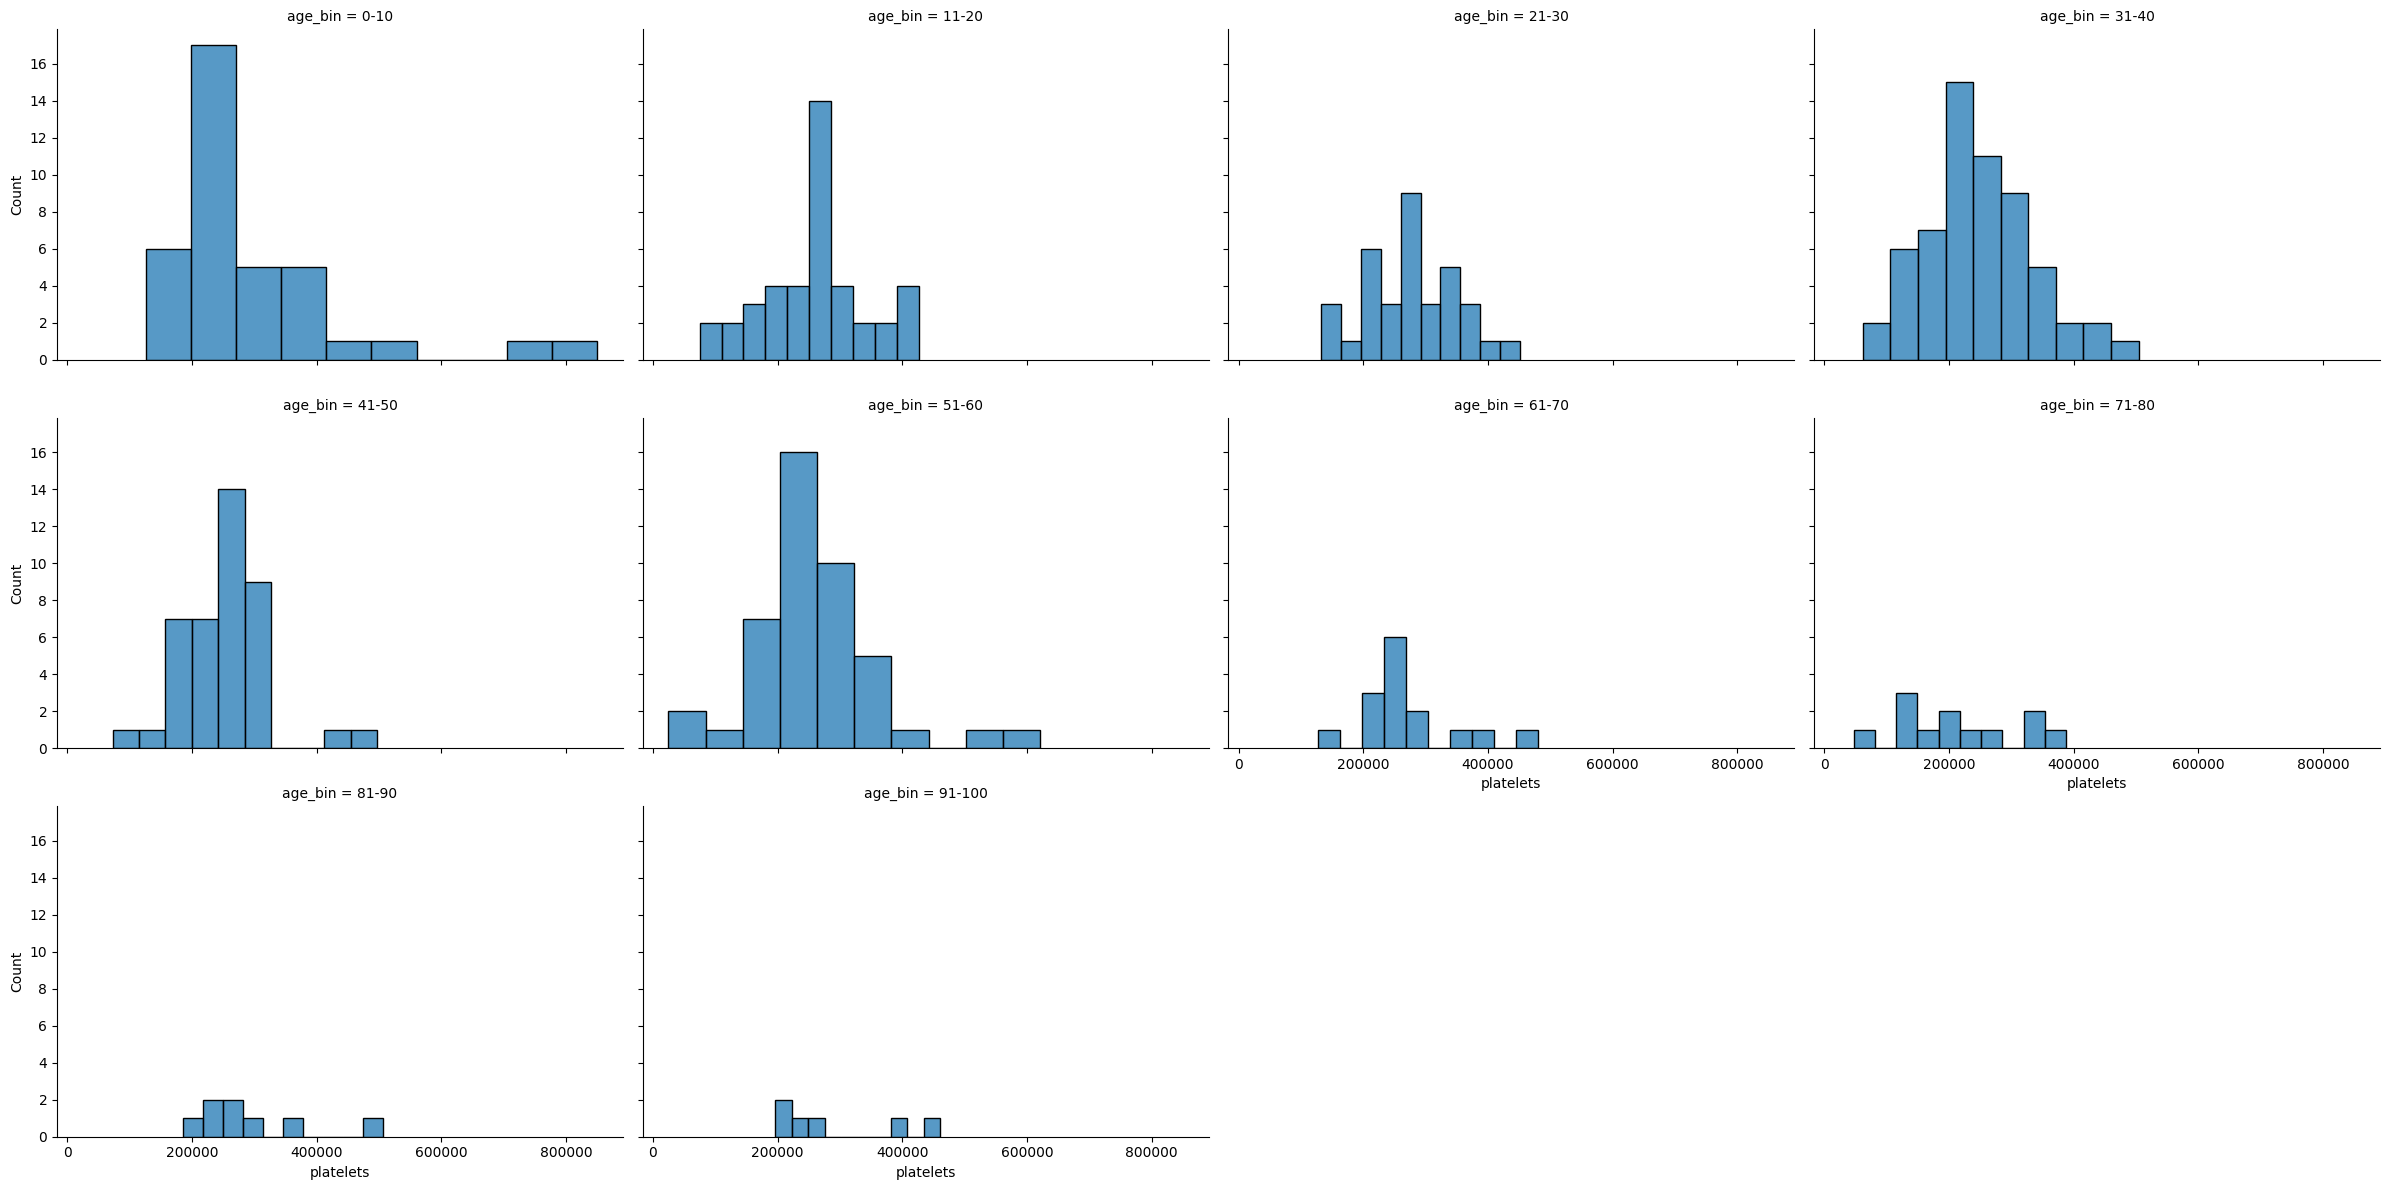

In [ ]:
g = sns.FacetGrid(df, col='age_bin', height=4, aspect=1.5,col_wrap=4)
g.map(sns.histplot, 'platelets',bins=10)

5.correlation between creatinine ans sodium levels

In [ ]:
df['serum_creatinine'].corr(df['serum_sodium'])


#A correlation of -0.189 suggests a weak negative relationship between the two variables.
# This means that there is a slight tendency for one variable to decrease as the other increases,
# but the relationship is not strong.

#one unit change in one variable results in change in another variable with a probability of -0.189 in negative direction


-0.1890952100911741

6. how does the prevalence of high blood pressure differ between male and female patients?

<ipython-input-24-a4cb30868b10>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','high_blood_pressure']).size().unstack().plot(kind='bar')


<Axes: xlabel='sex'>

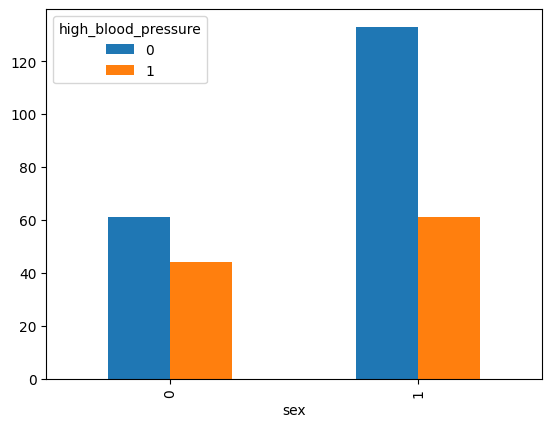

In [ ]:
#prevalence of high blood pressure differ between male and female patients

df.groupby(['sex','high_blood_pressure']).size().unstack().plot(kind='bar')

In [ ]:
# Calculate the number of patients with high blood pressure for each gender
blood_pressure_female_count = len(df[(df['sex'] == 0) & (df['high_blood_pressure'] == 1)])
blood_pressure_male_count = len(df[(df['sex'] == 1) & (df['high_blood_pressure'] == 1)])


blood_pressure_female_per=(blood_pressure_female_count/len(df))*100
blood_pressure_male_per=(blood_pressure_male_count/len(df))*100

print(f'percentage of female patients having high blood pressure are {blood_pressure_female_per}')
print(f'percentage of male patients having high blood pressure are {blood_pressure_male_per}')

percentage of female patients having high blood pressure are 14.715719063545151
percentage of male patients having high blood pressure are 20.401337792642142


7. what is the relationship between smoking habits and the occurance of heart failure?

In [ ]:
smoking_per=len(df[df['smoking']==1])/len(df['smoking'])*100
non_smoking_per=len(df[df['smoking']==0])/len(df['smoking'])*100

print(f'percentage of smoking patients are {smoking_per}')
print(f'percentage of non smoking patients are {non_smoking_per}')

percentage of smoking patients are 32.10702341137124
percentage of non smoking patients are 67.89297658862876


so smoking is not a big factor in causing heart failure.
why because 67.89% of people are non-smokers but they are heart failure patients.

<ipython-input-27-07b586c9a112>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['smoking','DEATH_EVENT']).size().unstack().plot(kind='bar')


<Axes: xlabel='smoking'>

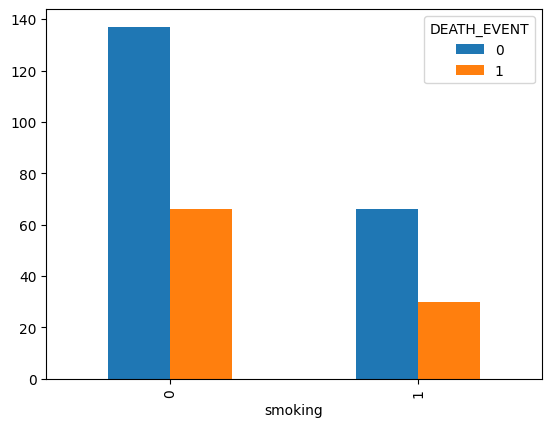

In [ ]:
df.groupby(['smoking','DEATH_EVENT']).size().unstack().plot(kind='bar')

so heart_failure is not all based onnsmoking factor.

and also the person who is smoking and non-smoker both have same probabilities of DEATH_EVENT

8. are there any noticable patterns in the distribution of death events different age groups?

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


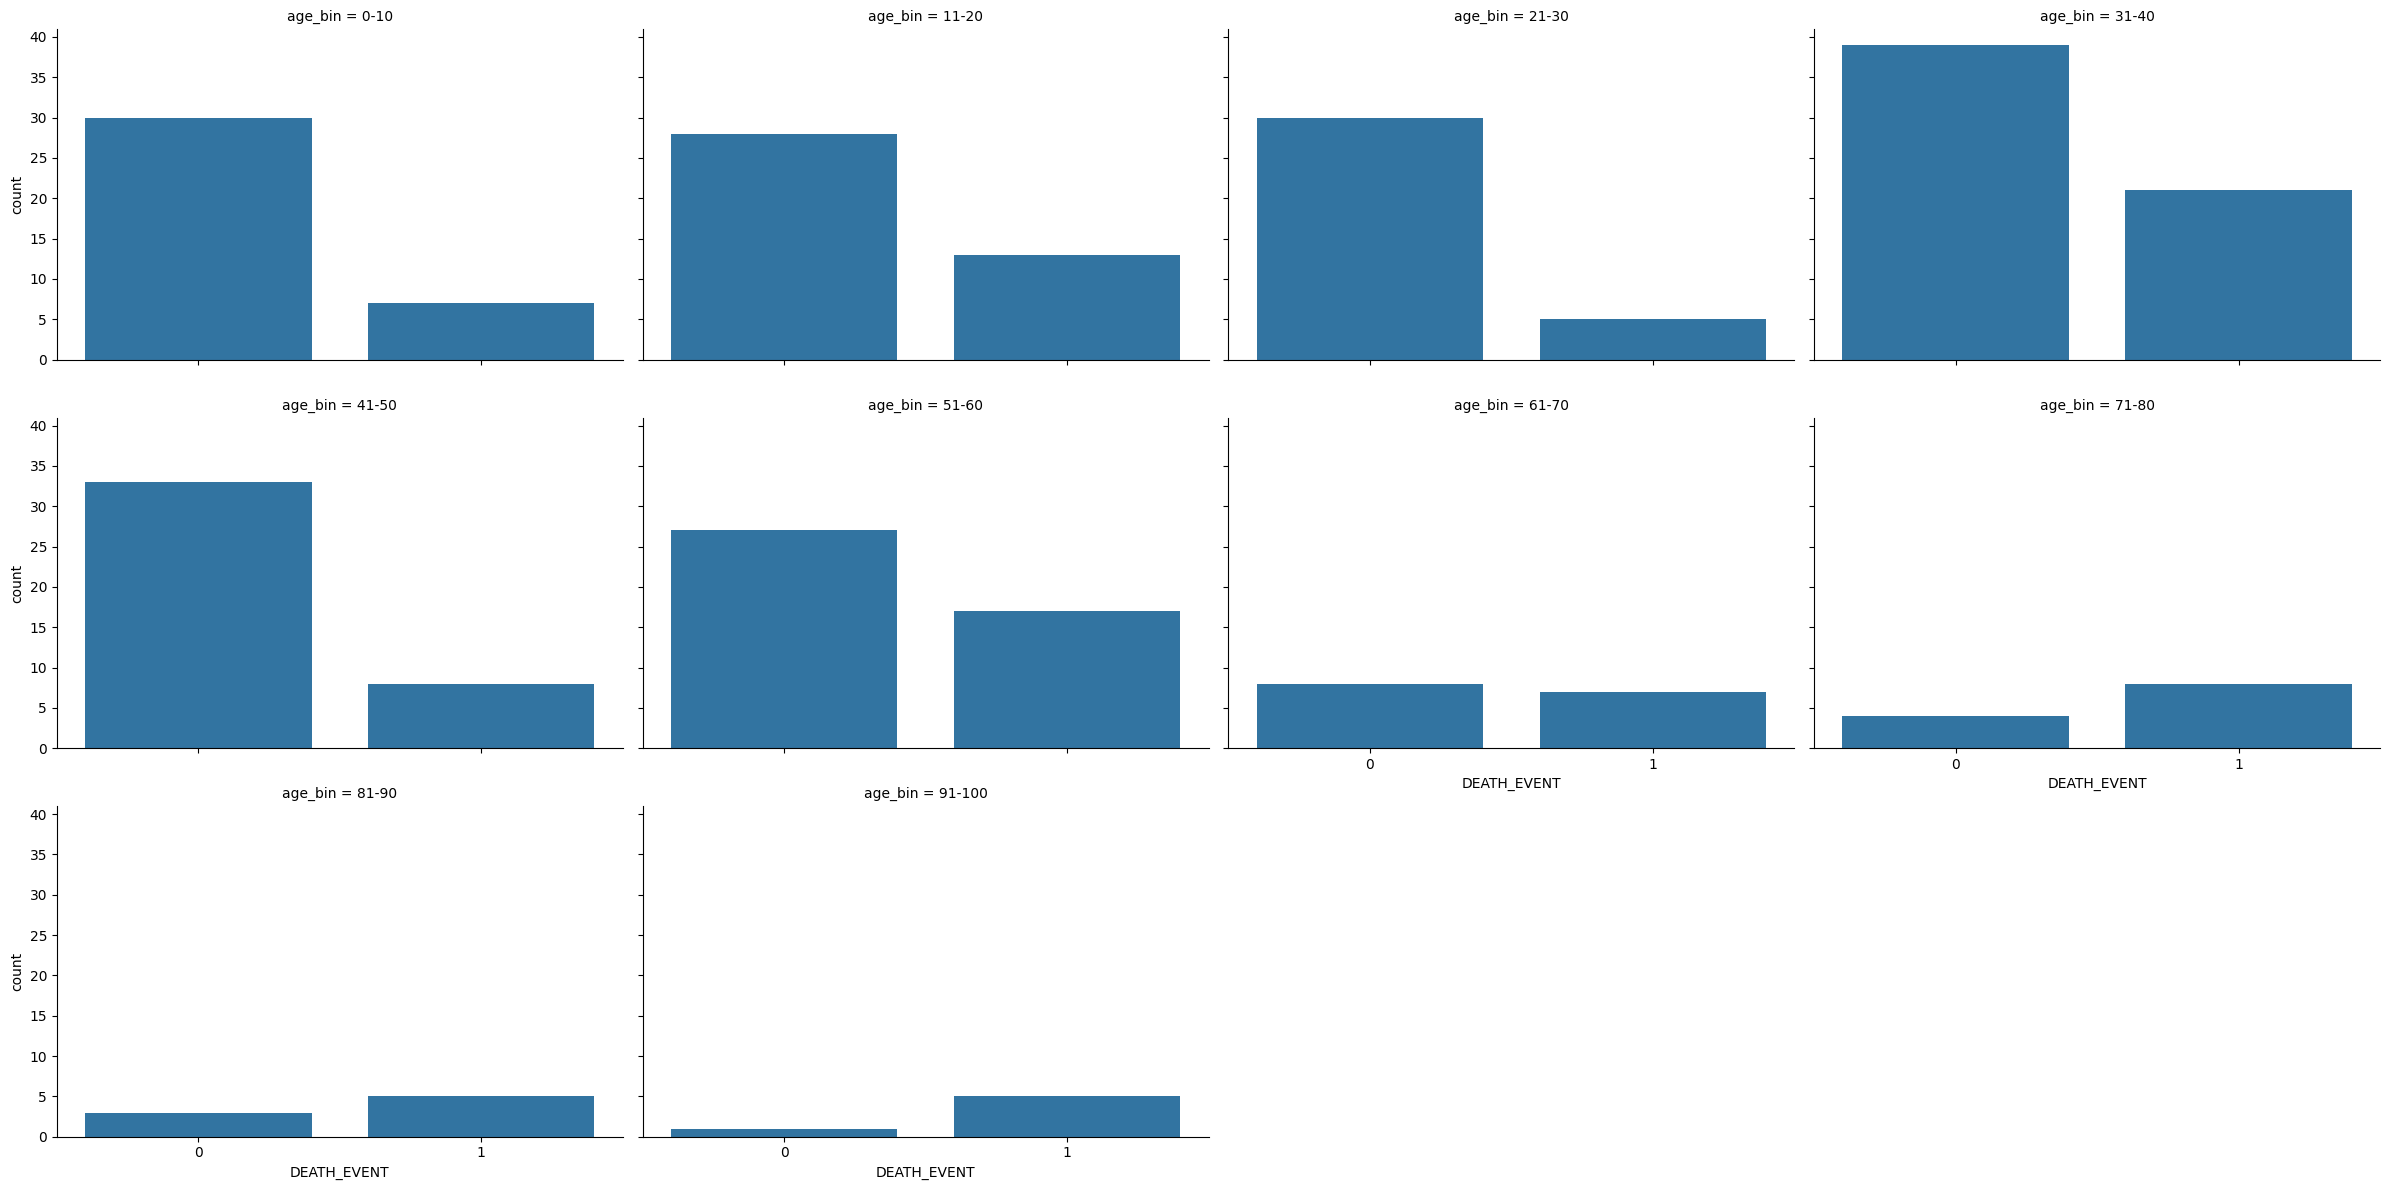

In [ ]:
g=sns.FacetGrid(df,col='age_bin',height=4,aspect=1.5,col_wrap=4)
g.map(sns.countplot,'DEATH_EVENT')

#observations:

#the heart failure patients are mostly in the range 0 to 60 age
#in that range also the category of age 41-50 there are mostly heart failures
#the age group 61-100 are less in number

#but the people under the category 0- 60 age has higher probabaility chances of living
#but the category 61-100 have higher chances of death occur
#if we observe from age 61-100 the probability of chance of death has increased rapidly


9. is there any significant difference in ejection fraction between patients with and without diabetes?

In [ ]:
with_diab=df[df['diabetes']==1]['diabetes']
without_diab=df[df['diabetes']==0]['diabetes']
print(f'the number of patients with diabetes are {len(with_diab)}')
print(f'the number of patients without diabetes are {len(without_diab)}')

the number of patients with diabetes are 125
the number of patients without diabetes are 174


In [ ]:
# Get ejection fraction (EF) values for both groups
with_diab = df[df['diabetes'] == 1]['ejection_fraction']
without_diab = df[df['diabetes'] == 0]['ejection_fraction']

# Print the number of patients in each group
print(f'The number of patients with diabetes: {with_diab.describe()}')
print(f'The number of patients without diabetes: {without_diab.describe()}')


The number of patients with diabetes: count    125.000000
mean      38.016000
std       11.283719
min       15.000000
25%       30.000000
50%       38.000000
75%       40.000000
max       62.000000
Name: ejection_fraction, dtype: float64
The number of patients without diabetes: count    174.000000
mean      38.132184
std       12.247439
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64


<ipython-input-35-0043446a0ec4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['diabetes','ejection_fraction']).size().unstack().plot(kind='bar')


<Axes: xlabel='diabetes'>

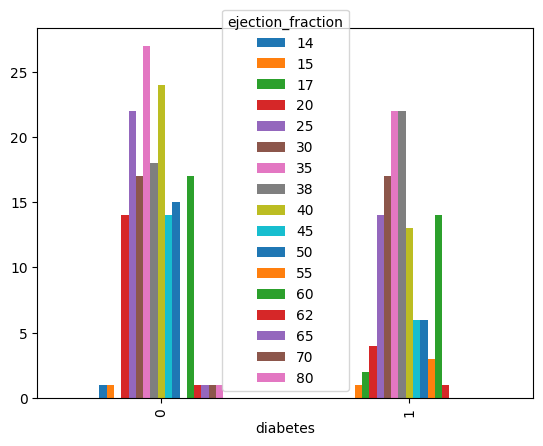

In [ ]:
df.groupby(['diabetes','ejection_fraction']).size().unstack().plot(kind='bar')

With Diabetes:
Count: 125
Mean: 38.016
Standard Deviation: 11.284
Without Diabetes:
Count: 174
Mean: 38.132
Standard Deviation: 12.247
calculating the t-test and p-value .

The result of the independent samples t-test is:

t-statistic: -0.084
p-value: 0.933
Since the p-value (0.933) is much greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This means that there is no significant difference in ejection fraction between patients with and without diabetes based on the provided data. ​

10. how does the serum creatinine level vary between patients who survived and those who did not?

<Axes: xlabel='serum_creatinine', ylabel='Density'>

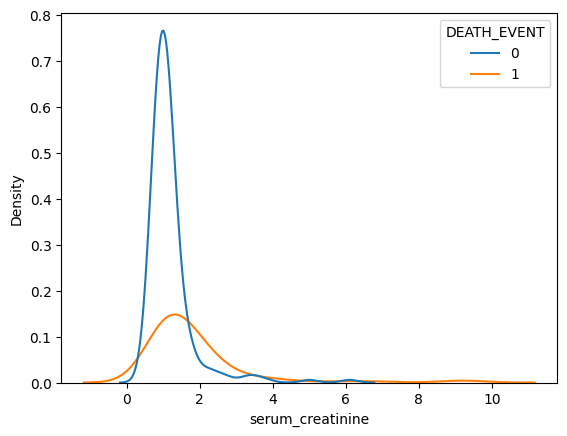

In [ ]:
sns.kdeplot(df,x='serum_creatinine',hue='DEATH_EVENT')


In [ ]:
print('describing the serum_creatinine of patients who have died due to heart failure')
print(df[df['DEATH_EVENT']==1]['serum_creatinine'].describe())

print()
print('describing the serum_creatinine of patients who have not died due to heart failure')

print(df[df['DEATH_EVENT']==0]['serum_creatinine'].describe())


describing the serum_creatinine of patients who have died due to heart failure
count    96.000000
mean      1.835833
std       1.468562
min       0.600000
25%       1.075000
50%       1.300000
75%       1.900000
max       9.400000
Name: serum_creatinine, dtype: float64

describing the serum_creatinine of patients who have not died due to heart failure
count    203.000000
mean       1.184877
std        0.654083
min        0.500000
25%        0.900000
50%        1.000000
75%        1.200000
max        6.100000
Name: serum_creatinine, dtype: float64


In [ ]:
|